In [4]:
import requests
import json
import time
from datetime import date
from datetime import datetime
from helpers.history_fetcher import HistoryFetcher
import dateutil.parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdelt
%load_ext autoreload
%autoreload 2

pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Introduction

Our project idea came from the observation that some wikipedia pages seems to get updated a lot after a related events happens. This could be observed during the Catalonia crisis that happened in september-october 2017. 

TODO must explain differences between initial plan and this plan.

Part 1

The first step for our project was then to find evidence of the correlation between events and edits on wikipedia. To tackle this problem we decided to first take a special case: the 2014 Ukraine war. Our approach is to first show a visual argument (plots).

---
### Part I - Finding evidence of (main events => lots of wikipedia edits)

#### 1 - Find a dataset that contains events for the Ukraine war. 

The UCDP GED dataset is perfectly suited for this task as it contains all armed events that happen in Ukraine in 2014. 

In [3]:
gd1 = gdelt.gdelt(version=1)
results = gd1.Search(['2014 February 01','2014 April 30'],table='events')

/Users/combes/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:69: UserWarning: GDELT does not have a url for date time 20140319
  warnings.warn(message)
/Users/combes/anaconda3/lib/python3.6/site-packages/gdelt/parallel.py:105: UserWarning: GDELT did not return data for date time 20140319
  warnings.warn(message)


In [15]:
results.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_Lat',
       'Actor1Geo_Long', 'Actor1Geo_FeatureID', 'Actor2Geo_Type',
       'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code',
       'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor

In [5]:
ukraine_events = results[results['ActionGeo_CountryCode'] == 'UP']
ukraine_events['SQLDATE'] = ukraine_events['SQLDATE'].map(lambda d: pd.Timestamp(str(d)))
ukraine_events = ukraine_events.set_index('SQLDATE')
ukraine_events = ukraine_events.loc[ukraine_events.index > pd.Timestamp('20140101')]
ukraine_events_dates = list(ukraine_events.index)

#### 2 - Grab the history (i.e. edits) of Ukraine's wikipedia page.

In order to grab the edits history for any wikipedia page, we used wikipedia's API and abtracted it through our HistoryFetcher class. 

In [6]:
history_fetcher = HistoryFetcher('Ukraine')
response = history_fetcher.get_history('20140101000000', '20140601000000')

In [7]:
dates = list(map(lambda revision: revision['timestamp'], response))
changes_size = list(map(lambda revision: revision['change_size'], response))

#### 3 - Plot the number of edits and events over time

This task was done using simple plots with matplotlib

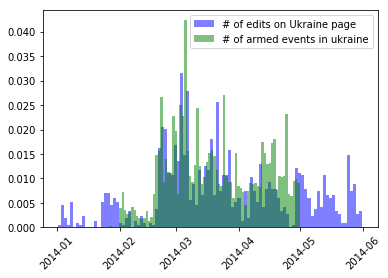

In [14]:
plt.hist(dates, bins=100, normed=True, color='blue', alpha=0.5, label='# of edits on Ukraine page')
#plt.hist(ukraine_war_dates, bins=100, alpha=0.5, color='grey', label='# of edits on Ukraine war page')
plt.hist(ukraine_events_dates, bins=100, color='green', normed=True, alpha=0.5, label='# of armed events in ukraine')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

TODO part on events that are not detected : example 2015 terror attacks in Paris

---
### Part II - A first prototype for our index

---
### Part III - Showing the limits

### Temp Garbage

In [ ]:
dates_events = ukraine_ged_df.date_start.values
deaths_all = ukraine_ged_df['deaths all'].values

ukraine_war_history_fetcher = HistoryFetcher('War in Donbass')
ukraine_war_response = history_fetcher.get_history('20140101000000', '20161130000000')

ukraine_war_dates = list(map(lambda revision: revision['timestamp'], ukraine_war_response))

In [256]:
spain_history_fetcher = HistoryFetcher('Catalonia')
spain_history = spain_history_fetcher.get_history('20170901000000', '20171115000000')
spain_dates = list(map(lambda revision: revision['timestamp'], spain_history))

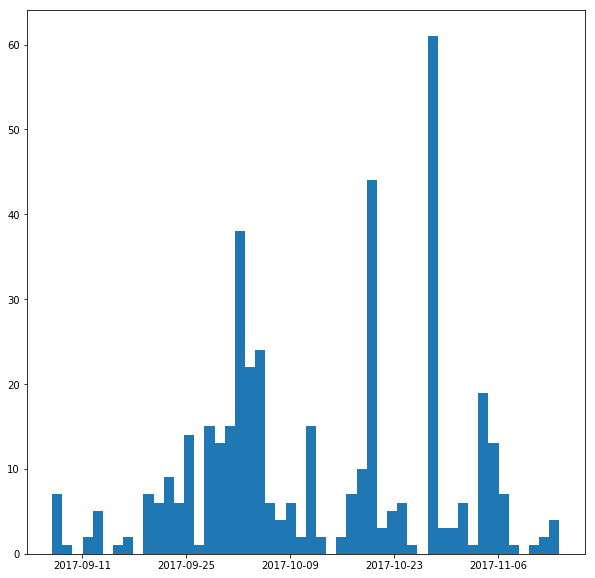

In [257]:
plt.hist(spain_dates, bins=50)
plt.show()

In [16]:
france_history_fetcher = HistoryFetcher('France')
france_history = france_history_fetcher.get_history('20141201000000', '20160230000000')
france_dates = list(map(lambda revision: revision['timestamp'], france_history))

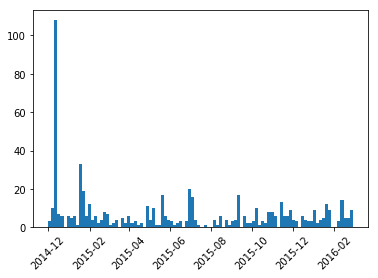

In [22]:
plt.hist(france_dates, bins=100)
plt.xticks(rotation=45)
plt.show()

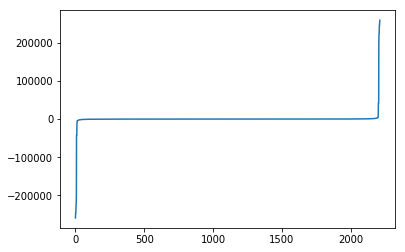

In [153]:
plt.plot(sorted(changes_size))
plt.show()

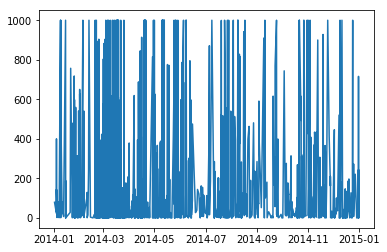

In [151]:
plt.plot(dates, list(map(lambda cs: max(min(abs(cs), 1000), -1000), changes_size)))
plt.show()

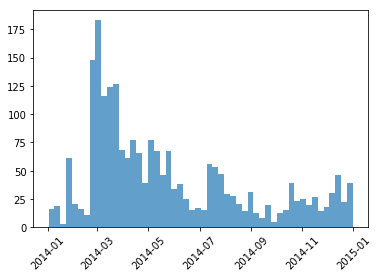

In [154]:
plt.hist(dates, bins=52, alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [135]:
catalonia_history_fetcher = HistoryFetcher('Catalonia')
catalonia_response = catalonia_history_fetcher.get_history('20170801000000', '20171120000000')
catalonia_dates = list(map(lambda revision: dateutil.parser.parse(revision['timestamp']), catalonia_response))

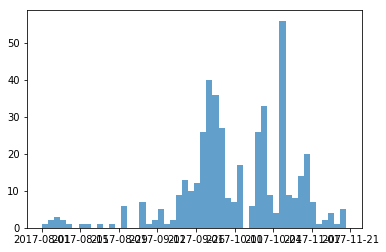

In [138]:
plt.hist(catalonia_dates, bins=50, alpha=0.7)
plt.show()

In [71]:
test2

[1, 2, 3]

In [217]:
len(response)

997

In [152]:
wikipage_title = 'Ukraine'

payload = {'action': 'query',
            'prop': 'revisions',
            'titles': wikipage_title,
            'rvprop': 'ids|flags|timestamp|comment|user|size',
          'format': 'json',
          'rvlimit': 500}

In [156]:
payload['rvstart'] = '2014-02-01T23:59:00Z'
payload['rvend'] = '2014-01-01T23:59:00Z'

response = requests.get(WIKI_URL, params=payload)

In [157]:
response

<Response [200]>

In [90]:
json.load(response.content)

AttributeError: 'bytes' object has no attribute 'read'

In [176]:
list(response.json()['query']['pages'].values())[0]['revisions']

[{'comment': '',
  'parentid': 593280510,
  'revid': 593427887,
  'size': 222598,
  'timestamp': '2014-02-01T13:12:04Z',
  'user': 'Anonymous from the 21st century'},
 {'comment': "[[Help:Reverting|Reverted]] 2 [[Wikipedia:Pending changes|pending]] edits by [[Special:Contributions/Red zenith|Red zenith]] to revision 593273696 by 217.76.1.22: Please provide an external source; don't just quote something and hide it in a ref tag",
  'parentid': 593275091,
  'revid': 593280510,
  'size': 222597,
  'timestamp': '2014-01-31T14:26:44Z',
  'user': 'ElHef'},
 {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
  'minor': '',
  'parentid': 593274690,
  'revid': 593275091,
  'size': 223224,
  'timestamp': '2014-01-31T13:41:56Z',
  'user': 'Red zenith'},
 {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
  'parentid': 593273696,
  'revid': 593274690,
  'size': 223247,
  'timestamp': '2014-01-31T13:38:40Z',
  'user': 'Red zenith'},
 {'anon': '',
  'comment': '',
 

In [158]:
response.json()

{'batchcomplete': '',
 'query': {'pages': {'31750': {'ns': 0,
    'pageid': 31750,
    'revisions': [{'comment': '',
      'parentid': 593280510,
      'revid': 593427887,
      'size': 222598,
      'timestamp': '2014-02-01T13:12:04Z',
      'user': 'Anonymous from the 21st century'},
     {'comment': "[[Help:Reverting|Reverted]] 2 [[Wikipedia:Pending changes|pending]] edits by [[Special:Contributions/Red zenith|Red zenith]] to revision 593273696 by 217.76.1.22: Please provide an external source; don't just quote something and hide it in a ref tag",
      'parentid': 593275091,
      'revid': 593280510,
      'size': 222597,
      'timestamp': '2014-01-31T14:26:44Z',
      'user': 'ElHef'},
     {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
      'minor': '',
      'parentid': 593274690,
      'revid': 593275091,
      'size': 223224,
      'timestamp': '2014-01-31T13:41:56Z',
      'user': 'Red zenith'},
     {'comment': '/* Western Ukraine, Carpathian Ruthenia,

In [76]:
r2 = requests.get(WIKI_URL, params={'rvcontinue': "20120521201045|493714738"})

In [77]:
r2

<Response [200]>

In [ ]:
r2.content